http://www.fsma.edu.br/si/edicao4/FSMA_SI_2009_2_Tutorial.pdf
http://www.lbd.dcc.ufmg.br/colecoes/enia/2005/061.pdf

# Conteúdos

## Técnicas e Algoritmos
* Partitional (K-means)
* Hierarchical (Hierarchical Agglomerative Clustering)

## Métricas de Avaliação
* V-Measure Score (Homogeneity and Completeness)
* Adjusted Rand Index (ARI)
* Silhouette Score


## Dataset

Nesta aula nós iremos utilizar o dataset Iris para demonstrar o funcionamento dos algoritmos.

* Iris dataset (info)
    * 150 samples
    * 3 classes (setosa, veriscolor, virgínica)
    * https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :]
y = iris.target

### Dados

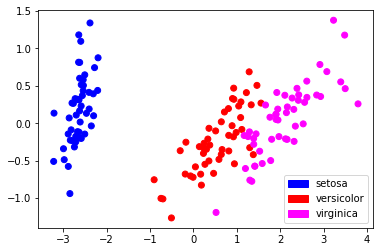

In [2]:
label_name = iris.target_names

from sklearn.decomposition import PCA
data = PCA(n_components=2).fit_transform(X)

color_label = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'magenta'}
y_label = [label_name[x] for x in y]
label_color = [color_label[x] for x in y_label]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.scatter(data[:, 0], data[:, 1], c=label_color)
team_patches = [mpatches.Patch(color=color, label=team) for team, color in color_label.items()]
plt.legend(handles=team_patches)
plt.show()

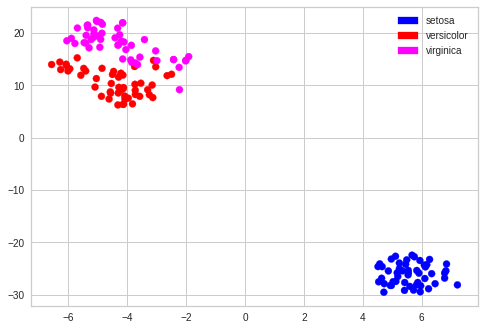

In [32]:
from sklearn.manifold import TSNE
data = TSNE().fit_transform(X)
color_label = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'magenta'}
y_label = [label_name[x] for x in y]
label_color = [color_label[x] for x in y_label]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.scatter(data[:, 0], data[:, 1], c=label_color)
team_patches = [mpatches.Patch(color=color, label=team) for team, color in color_label.items()]
plt.legend(handles=team_patches)
plt.show()

## K-means


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
print(kmeans) # modelo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


#### Alguns parâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

n_clusters - quantidade de partições (clusters)
init - método de inicialização dos centróides (kmeans++ or random)
n_init - número de vezes que o algoritmo k-means será executado com diferentes "seeds" centróides

#### Alguns atributos

cluster_centers_ - lista de representantes (centróides) de cada grupo
labels_ - índice do cluster atribuído a cada objeto

#### Construindo o modelo e realizando a predição

In [24]:
kmeans.fit(X) # ajustando o modelo
y_pred_kmeans = kmeans.labels_

#### Visualizando resultados do agrupamento (K-means)

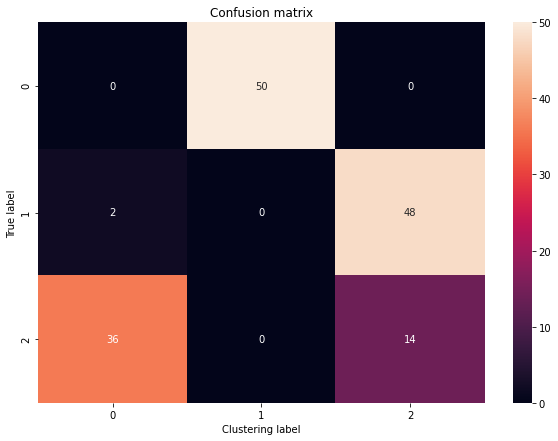

In [5]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_kmeans)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

#### Visualizando os centróides de cada grupo

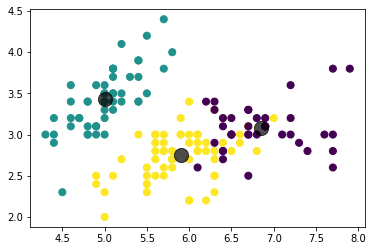

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);



```
# This is formatted as code
```

## Hierarchical Agglomerative Clustering



In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
distance = pdist(X, metric='cosine')
Z = linkage(distance, method='centroid', metric='cosine')

O método **linkage** realiza o agrupamento, gerando um matriz Z de distância condensada

scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

onde,


**y** - é um vetor de distância entre os pares de observações (pode ser calculado pela função pdist)
* 
**pdist** - Pairwise distances between observations in n-dimensional space (X, metric='euclidean', *args, **kwargs)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

**method** - método utilizado para computar a distância *d(s,t)* entre dois clusters (***s*** e ***t***); a lista de métodos e seus respectivos detalhes estão disponíveis em:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage


A matriz gerada (**Z**) representa um dendograma, onde o primeiro e o segundo elemento são os dois clusters aglomerados (fundidos) em cada passo, o terceiro elemento é a distância entre esses clusters, e o quarto elemento é o tamanho do novo cluster. Considere o primeiro elemento da matriz Z

[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00]

In [8]:
X[101], X[142] # os objetos são iguais, portanto a distância entre eles é 0

(array([5.8, 2.7, 5.1, 1.9]), array([5.8, 2.7, 5.1, 1.9]))

#### Visualizando o dendograma

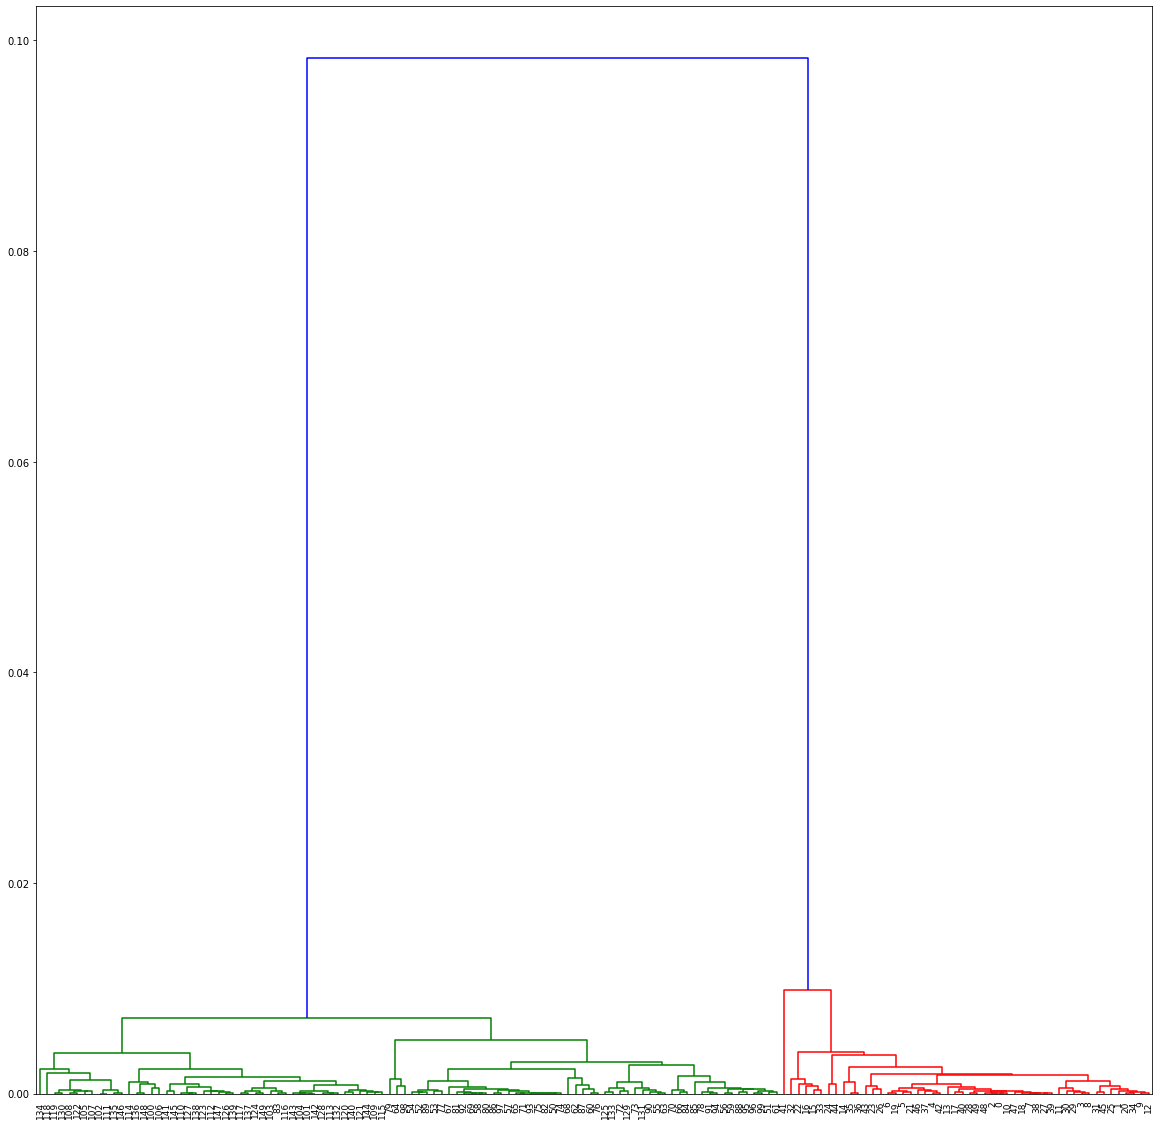

In [9]:
plt.figure(figsize=(20,20))
dn = dendrogram(Z,leaf_font_size=9)

## Utilizando HAC para gerar os clusters

In [10]:
from scipy.cluster.hierarchy import cut_tree
clusters = cut_tree(Z,height=0.05) #0.05 cosine
y_pred_hac = clusters.flatten()

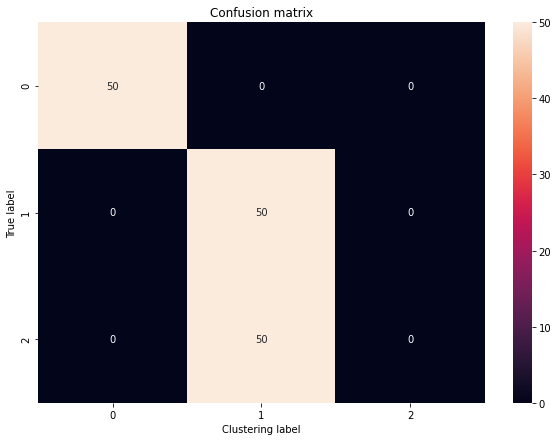

In [11]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_hac)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

## Métricas de Avaliação

#### V-score




In [13]:
from sklearn.metrics.cluster import v_measure_score

print('V-score K-means', v_measure_score(y, y_pred_kmeans))
print('V-score HAC', v_measure_score(y, y_pred_hac))

V-score K-means 0.7581756800057784
V-score HAC 0.7336804366512104


#### Índice de Rand



In [14]:
from sklearn.metrics.cluster import adjusted_rand_score

print('ARI K-means', adjusted_rand_score(y, y_pred_kmeans))
print('ARI HAC', adjusted_rand_score(y, y_pred_hac))


ARI K-means 0.7302382722834697
ARI HAC 0.5681159420289855


In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


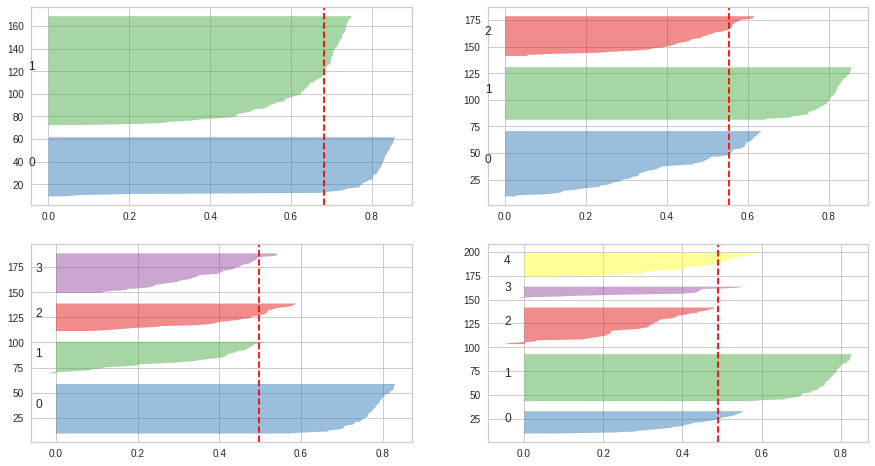

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)